<a href="https://colab.research.google.com/github/Maruf346/AI-ML-with-python/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training a Neural Network using Backpropagation**

**Importing necessary libraries, loading iris dataset and splitting into training and testing.**

In [125]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading dataset
data = load_iris ()
# Dividing the dataset into target variable and features
X=data.data
y=data.target

# Splitting dataset into training and testing
X_train , X_test , y_train , y_test = train_test_split(X, y,
test_size =20, random_state =4)
y_train = y_train.reshape(( y_train.shape[0], 1))
y_test = y_test.reshape ((y_test.shape[0], 1))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(130, 4)
(20, 4)
(130, 1)
(20, 1)


**Now in the next step, we have to start initializing the hyperparameters. We will input the learning rate, iterations, input size, number of hidden layers, and number of output layers.**

In [134]:
learning_rate = 0.2
iterations = 10000
N = y_train.size

# Input features
input_size = 4

# Hidden layers
hidden_size = 2

# Output layer
output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])

**Randomly initialize the weights.**

In [135]:
np.random.seed (10)

# Hidden layer
W1 = np.random.normal(scale =0.5, size=(input_size , hidden_size))

# Output layer
W2 = np.random.normal(scale =0.5, size=( hidden_size , output_size))


**Creating helper functions such as mean squared error, accuracy and sigmoid.**

In [136]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred , y_true):
  return ((y_pred - y_true)**2).sum() / (2* y_pred.size)

def accuracy(y_pred , y_true):
  acc = y_pred.argmax(axis =1) == y_true.argmax(axis =1)
  return acc.mean()

**Next is building the Backpropogation model. We will create a for loop for a given number of iterations and will update the weights in each iteration. The model will go through three phases feedforward propagation, the error calculation phase, and the backpropagation phase.**

In [137]:
for itr in range(iterations):

# Implementing feedforward propagation on hidden layer
  Z1 = np.dot(X_train , W1)
  A1 = sigmoid(Z1)

# Implementing feed forward propagation on output layer
  Z2 = np.dot(A1, W2)
  A2 = sigmoid(Z2)


# Calculating the error
  mse = mean_squared_error(A2, y_train)
  acc = accuracy(A2, y_train)

  results = pd.concat([results, pd.DataFrame([{"mse":mse , "accuracy":acc}])], ignore_index=True)


# Backpropagation phase
  E1 = A2 - y_train
  dW1 = E1 * A2 * (1 - A2)

  E2 = np.dot(dW1 , W2.T)
  dW2 = E2 * A1 * (1 - A1)


# Updating the weights
  W2_update = np.dot(A1.T, dW1) / N
  W1_update = np.dot(X_train.T, dW2) / N

  W2 = W2 - learning_rate * W2_update
  W1 = W1 - learning_rate * W1_update


/tmp/ipython-input-137-3720061712.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{"mse":mse , "accuracy":acc}])], ignore_index=True)


**Now we will plot the mean squared error using pandas plot() function.**

<Axes: title={'center': 'Mean Squared Error'}>

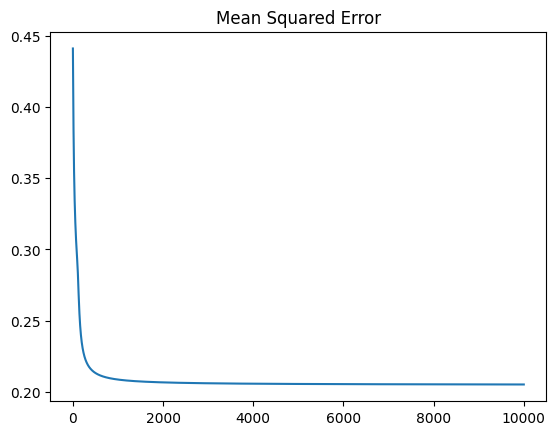

In [138]:
results.mse.plot(title="Mean Squared Error")


**And accuracy using the pandas plot() function.**

<Axes: title={'center': 'Accuracy'}>

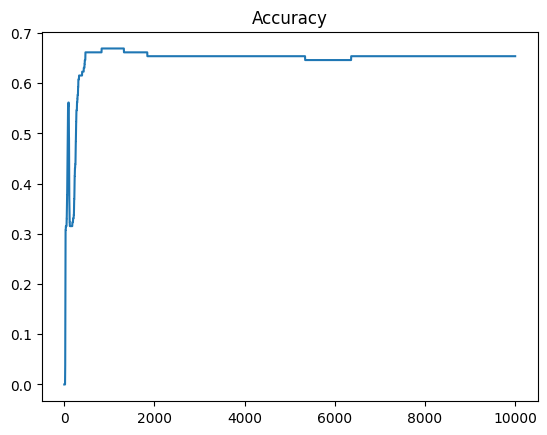

In [139]:
results.accuracy.plot(title="Accuracy")

**Now we will calculate the accuracy of the model.**

In [141]:
Z1 = np.dot(X_test , W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.85
